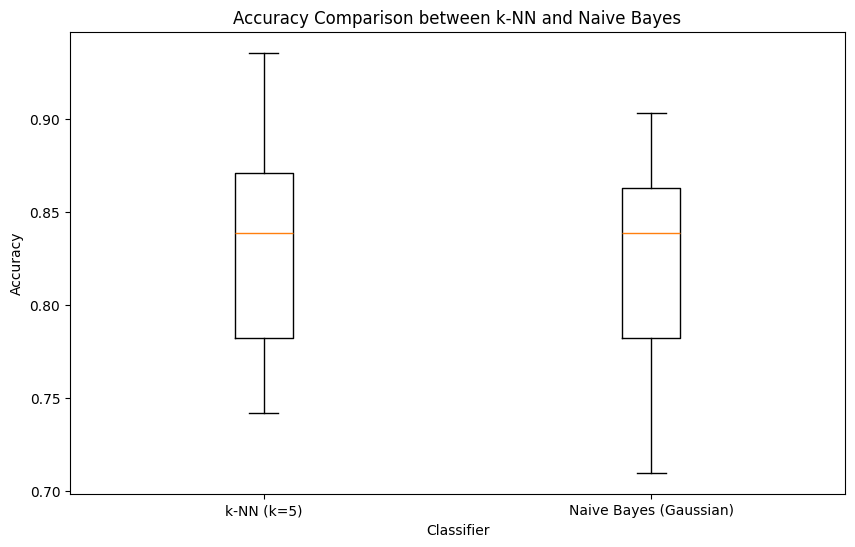

In [30]:
#1.a)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

data, meta = arff.loadarff('column_diagnosis.arff')

df = pd.DataFrame(data)

X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    #  k-NN 
    knn_classifier.fit(X_train, y_train)
    knn_accuracy = knn_classifier.score(X_test, y_test)
    knn_accuracies.append(knn_accuracy)

    #  naive Bayes 
    nb_classifier.fit(X_train, y_train)
    nb_accuracy = nb_classifier.score(X_test, y_test)
    nb_accuracies.append(nb_accuracy)

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['k-NN (k=5)', 'Naive Bayes (Gaussian)'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between k-NN and Naive Bayes')
plt.show()


In [31]:
# 1.b)

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from scipy import stats

data, meta = arff.loadarff('column_diagnosis.arff')

df = pd.DataFrame(data)

X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn_classifier.fit(X_train, y_train)
    knn_accuracy = knn_classifier.score(X_test, y_test)
    knn_accuracies.append(knn_accuracy)

    nb_classifier.fit(X_train, y_train)
    nb_accuracy = nb_classifier.score(X_test, y_test)
    nb_accuracies.append(nb_accuracy)

t_stat, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies)

alpha = 0.05

if p_value < alpha:
    print("True (reject the null hypothesis): k-NN is statistically superior to Naive Bayes regarding accuracy.")
else:
    print("False (fail to reject the null hypothesis): There is no statistically significant difference in accuracy between k-NN and Naive Bayes.")


False (fail to reject the null hypothesis): There is no statistically significant difference in accuracy between k-NN and Naive Bayes.


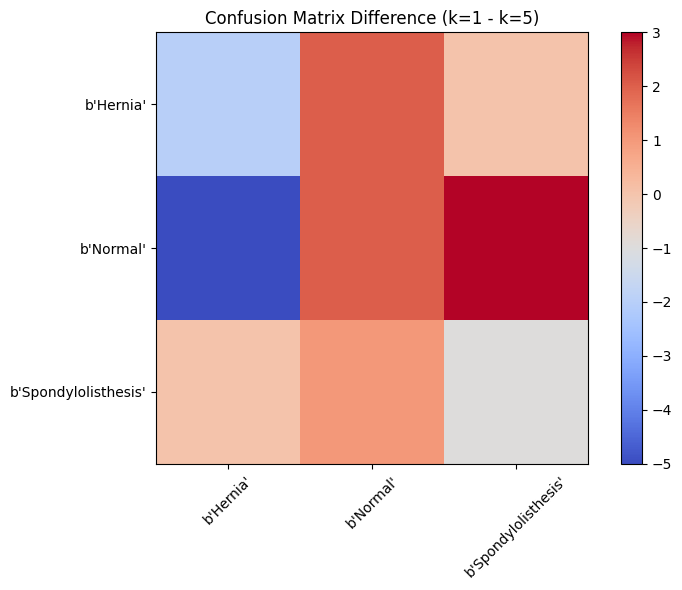

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

data, meta = arff.loadarff('column_diagnosis.arff')

df = pd.DataFrame(data)

X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier_5 = KNeighborsClassifier(n_neighbors=5)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

cm_1 = np.zeros((3, 3))  # assuming 3 classes (normal, disk hernia, spondylolisthesis)
cm_5 = np.zeros((3, 3))

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # k=1
    knn_classifier.fit(X_train, y_train)
    y_pred_1 = knn_classifier.predict(X_test)
    cm_1 += confusion_matrix(y_test, y_pred_1)

    # k=5
    knn_classifier_5.fit(X_train, y_train)
    y_pred_5 = knn_classifier_5.predict(X_test)
    cm_5 += confusion_matrix(y_test, y_pred_5)

cm_diff = cm_1 - cm_5

# plot
plt.figure(figsize=(8, 6))
plt.imshow(cm_diff, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix Difference (k=1 - k=5)')
plt.colorbar()
plt.xticks([0, 1, 2], label_encoder.classes_, rotation=45)
plt.yticks([0, 1, 2], label_encoder.classes_)
plt.tight_layout()
plt.show()



Suposição de Independência das Características:

O Naïve Bayes assume que todas as características são condicionalmente independentes dadas as classes. No conjunto de dados "column_diagnosis," as características biomecânicas podem não ser totalmente independentes. Por exemplo, pode haver relações complexas entre essas características que violam a suposição de independência. Se essas relações forem cruciais para a classificação, o Naïve Bayes pode ter dificuldade em capturá-las de maneira eficaz.

Distribuição Desequilibrada de Classes:

Se o conjunto de dados tiver uma distribuição de classes altamente desequilibrada, em que uma classe supera significativamente as outras, o Naïve Bayes pode ter dificuldade em prever com precisão as classes minoritárias. Em conjuntos de dados de saúde, a distribuição de tipos de doenças pode não ser equilibrada. O Naïve Bayes pode ter dificuldade em aprender com as classes minoritárias devido à escassez de exemplos, o que pode levar a previsões incorretas/tendenciosas.

Sensibilidade a Valores Atípicos:

O Naïve Bayes pode ser sensível a valores atípicos (outliers) no conjunto de dados. Medidas biomecânicas no domínio da saúde podem conter valores atípicos devido a erros de medição ou casos extremos raros. Estes podem afetar significativamente as estimativas de média e variância usadas nos cálculos de probabilidade do Naïve Bayes, o que pode levar a resultados de classificação subótimos.